In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

## Get data

In [2]:
X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()

x_whole = pd.concat([X_train_obs_combined, X_val_obs_combined])
y_whole = pd.concat([y_train_obs_combined, y_val_obs_combined])
pd.set_option('display.max_columns', None)

# PCA

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Bruker\OneDrive

Transformed data with PCA:
 [[-2.15333614  0.43192967  1.76836899 ... -0.16282071  0.09061029
  -0.02558739]
 [-1.01959988 -0.73500452 -1.45517815 ...  0.50767446 -0.27040331
   0.54799662]
 [ 0.119167    2.04891207  0.22271874 ... -0.44350696  0.07067659
   0.27634169]
 ...
 [-3.30576931  1.04093451 -1.9344751  ...  0.3588399  -0.27926283
  -0.84848639]
 [-2.55840116  0.81283072  1.91530449 ... -0.02696371  0.07538664
  -0.10910281]
 [-2.13228388 -2.60449599  0.59448362 ...  0.8984346  -0.72108235
  -0.86769231]]
Explained variance by each component: [0.25903529 0.11284318 0.0778422  0.07362684 0.04734181 0.04070433
 0.03704011 0.03339377 0.02779475 0.02747301 0.02550964 0.02291882
 0.02099204 0.01970305 0.01815266 0.0161574  0.01467924 0.01339755
 0.01223241 0.01162487 0.01058437 0.01025701 0.00971881 0.00931222
 0.00869583]


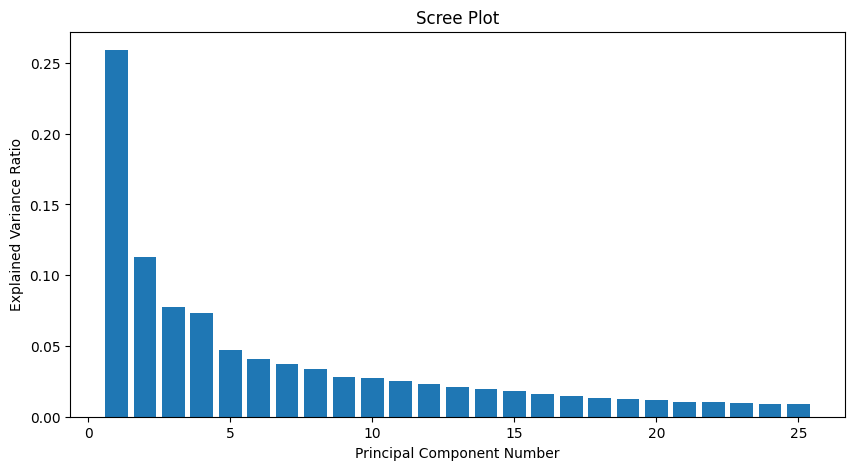

Component Loadings:
 [[ 0.14195508 -0.16570855  0.25808132 ...  0.04531572  0.21974078
   0.21319224]
 [ 0.20722254 -0.18048462  0.03982076 ...  0.0727098  -0.02857015
  -0.02567743]
 [ 0.19577199 -0.10997104 -0.12202264 ...  0.37551927  0.07389399
   0.08278824]
 ...
 [-0.10595387  0.07226937 -0.02126758 ... -0.01925209  0.09968373
   0.10780753]
 [ 0.0123307   0.00567337  0.00232136 ...  0.03261845 -0.09385193
  -0.10128661]
 [ 0.00285896 -0.04717268 -0.04486781 ... -0.00468776  0.01888482
   0.02069642]]


In [3]:
# Step 1: Standardize the data
scaler_X = StandardScaler()
data_std = scaler_X.fit_transform(x_whole)

# Step 2-6: Apply PCA
n_components = 25
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_std)

print("Transformed data with PCA:\n", data_pca)
print("Explained variance by each component:", pca.explained_variance_ratio_)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

print("Component Loadings:\n", pca.components_)



# CCA

In [4]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 3)  # first set of variables
Y = np.random.rand(100, 3)  # second set of variables

# Step 1: Standardize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_std = scaler_X.fit_transform(X)
Y_std = scaler_Y.fit_transform(Y)

# Step 2-5: Apply CCA
n_components = 2
cca = CCA(n_components=n_components)
X_c, Y_c = cca.fit_transform(X_std, Y_std)

print("Transformed X with CCA:\n", X_c)
print("Transformed Y with CCA:\n", Y_c)


Transformed X with CCA:
 [[ 0.83456797  0.1198394 ]
 [-0.07818366  0.36211992]
 [ 1.74361312  0.24905239]
 [ 0.98430984 -0.53188949]
 [ 1.00977284 -0.79601496]
 [-1.29695911 -0.43291183]
 [ 1.74650871  1.28837055]
 [ 0.22088494  1.29828064]
 [ 0.06656889 -1.82300114]
 [ 0.08837678  1.11104036]
 [ 0.83559523 -0.98515709]
 [-1.42634045  0.64493798]
 [ 0.85544571  0.90621636]
 [-0.4670809   0.47656207]
 [-1.22041491  1.07604727]
 [-1.25638873  0.05298267]
 [-0.38802312 -0.3940059 ]
 [ 1.22268411 -1.16793455]
 [-0.9884047  -0.44771376]
 [-0.37970127 -1.15579775]
 [-1.16067403 -0.5569802 ]
 [-1.16167517 -1.12650864]
 [-0.91184168  1.68531177]
 [ 1.48000894 -1.58991926]
 [ 0.68098309  1.66429239]
 [-1.13833047 -1.86451225]
 [-1.4381102  -0.6922068 ]
 [-1.23216914  0.28047683]
 [-0.71143941  0.33354018]
 [ 0.61664915 -0.61471887]
 [ 0.18032723 -1.26952761]
 [-0.93708479  0.22256586]
 [-1.21354794  1.03041553]
 [ 0.29377229 -1.98159996]
 [ 1.33142979 -0.0474492 ]
 [ 0.40673495  0.23067755]
 [ 

Canonical Correlations: These are the correlations between the canonical variables obtained from the two datasets. They give you a sense of how well the canonical variables from each dataset are related.

In [5]:
print("Canonical Correlations:", cca.cancorr_)

AttributeError: 'CCA' object has no attribute 'cancorr_'

In [ ]:
print("Canonical loadings for X:\n", cca.x_loadings_)
print("Canonical loadings for Y:\n", cca.y_loadings_)


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_c[:,0], Y_c[:,0], label='First Canonical Variable')
plt.scatter(X_c[:,1], Y_c[:,1], label='Second Canonical Variable')
plt.xlabel('Canonical X')
plt.ylabel('Canonical Y')
plt.title('Scatter plot of Canonical Variables')
plt.legend()
plt.show()
